# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan adalah **Pima Indians Diabetes Database**.<br>
Sumber: Kaggle / UCI Machine Learning Repository.<br>
Tujuan: Memprediksi apakah pasien memiliki diabetes atau tidak berdasarkan pengukuran diagnostik.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supaya grafik muncul rapi
%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
import kagglehub
import os

print("Sedang mendownload dataset 70k baris...")

# Download dataset
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

# Cari file CSV yang spesifik (kita pakai yang 50-50 split)
csv_file = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Load ke Pandas
df = pd.read_csv(csv_file)

print(f"Dataset berhasil dimuat! Ukuran data: {df.shape}")
# Harusnya muncul: (70692, 22)
df.head()

Sedang mendownload dataset 70k baris...
Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.
Dataset berhasil dimuat! Ukuran data: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
print(len(df))

70692


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

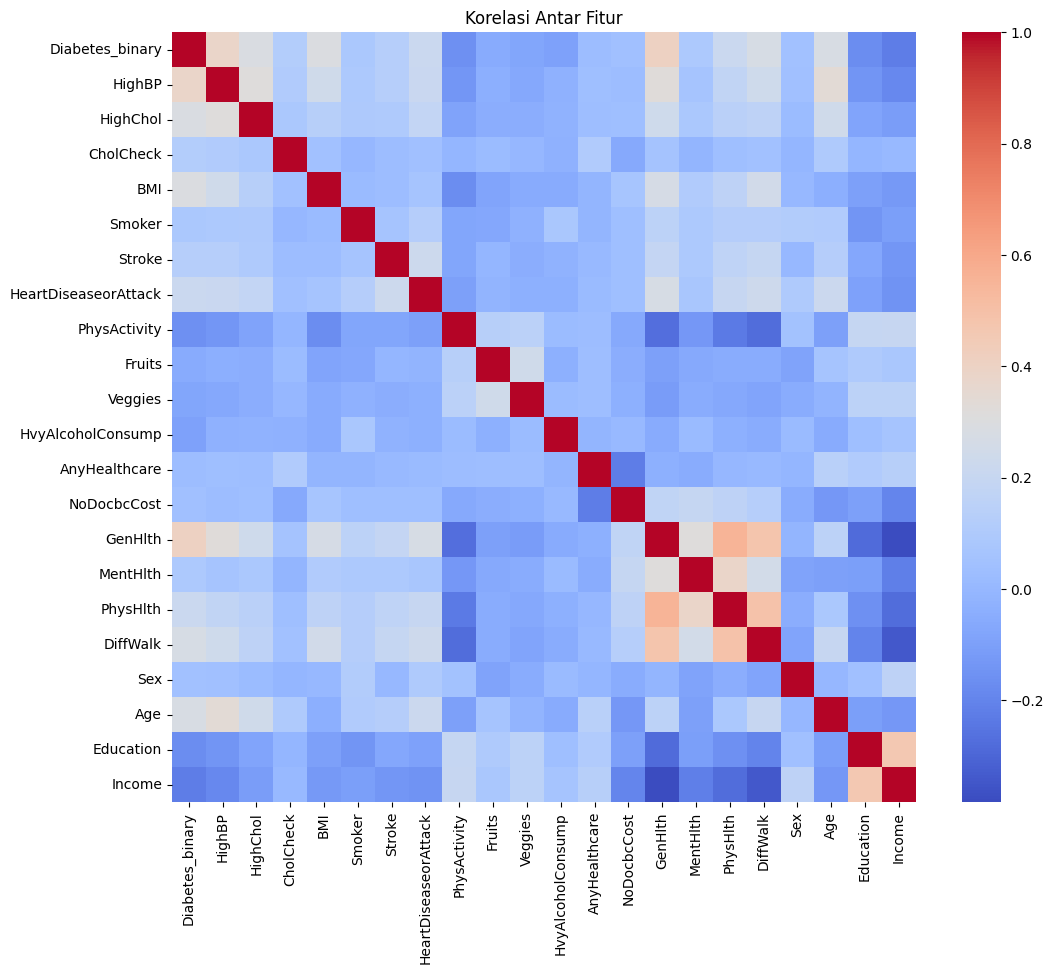

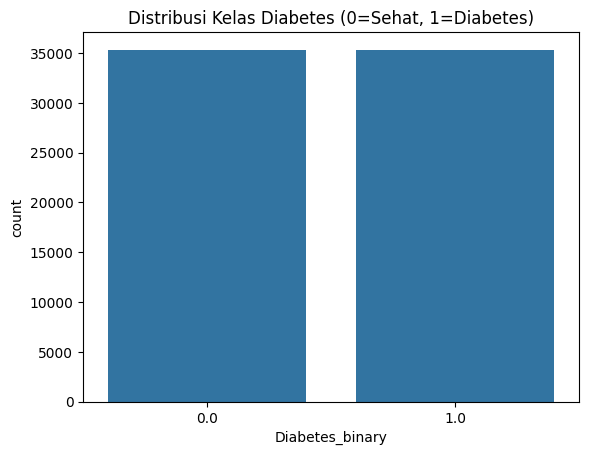

In [10]:
# Cek info data
print(df.info())

# Cek statistik dasar
print(df.describe())

# Visualisasi Korelasi (Heatmap)
plt.figure(figsize=(12, 10)) # Ukuran diperbesar dikit biar muat banyak kolom
sns.heatmap(df.corr(), cmap='coolwarm') # Hapus annot=True biar gak sumpek angkanya
plt.title('Korelasi Antar Fitur')
plt.show()

# Visualisasi Distribusi Target (GANTI 'Outcome' jadi 'Diabetes_binary')
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribusi Kelas Diabetes (0=Sehat, 1=Diabetes)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
# --- 1. Menghapus Data Duplikat ---
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Data duplikat dihapus: {initial_rows - df.shape[0]} baris.")

# --- 2. Handling Missing Values ---
# Dataset ini bersih, tapi kita tetap jalankan kodenya biar dapat poin "Handling Missing Values"
# Kita anggap kalau ada NaN, isi dengan Median
df.fillna(df.median(), inplace=True)

# --- 3. Deteksi dan Penanganan Outlier (Fitur: BMI) ---
# Kita buang BMI yang tidak masuk akal (terlalu ekstrim)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
# Filter: Hanya ambil data yang BMI-nya wajar
df = df[~((df['BMI'] < (Q1 - 1.5 * IQR)) | (df['BMI'] > (Q3 + 1.5 * IQR)))]
print(f"Sisa data setelah hapus outlier BMI: {df.shape[0]} baris.")

# --- 4. Binning (Pengelompokan Data) ---
# Kita kelompokkan BMI jadi: Underweight, Normal, Overweight, Obese
# Referensi WHO: <18.5, 18.5-24.9, 25-29.9, >30
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# --- 5. Encoding Data Kategorikal ---
# Ubah kategori BMI tadi jadi angka (One-Hot Encoding)
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)

# --- 6. Normalisasi / Standarisasi Fitur ---
# Target kolom di dataset ini namanya 'Diabetes_binary'
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gabungkan kembali
df_clean = pd.DataFrame(X_scaled, columns=X.columns)
df_clean['Diabetes_binary'] = y.values # Reset index biar rapi

# Simpan
output_csv = 'diabetes_70k_clean.csv'
df_clean.to_csv(output_csv, index=False)
print(f"Preprocessing Selesai! Data bersih ({df_clean.shape[0]} baris) disimpan di: {output_csv}")
df_clean.head()

Data duplikat dihapus: 1635 baris.
Sisa data setelah hapus outlier BMI: 66876 baris.


/tmp/ipython-input-1166887747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(), inplace=True)


Preprocessing Selesai! Data bersih (66876 baris) disimpan di: diabetes_70k_clean.csv


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Diabetes_binary
0,0.878379,-1.058722,0.161698,-0.562615,-0.966961,-0.259818,-0.42037,0.648371,-1.245806,0.522823,...,2.427374,-0.572193,1.081517,-1.615723,1.062059,1.06996,-0.509511,1.363066,-0.876217,0.0
1,0.878379,0.944535,0.161698,-0.562615,1.034168,3.848853,-0.42037,-1.542326,0.802693,-1.912695,...,-0.574930,-0.572193,1.081517,1.174823,1.062059,1.06996,-0.509511,1.363066,-0.876217,0.0
2,-1.138461,-1.058722,0.161698,-0.562615,-0.966961,-0.259818,-0.42037,0.648371,0.802693,0.522823,...,0.425838,-0.572193,1.081517,1.523641,1.062059,1.06996,-0.509511,1.363066,-0.876217,0.0
3,0.878379,0.944535,0.161698,-0.212508,1.034168,-0.259818,-0.42037,0.648371,0.802693,0.522823,...,-0.274699,-0.572193,1.081517,0.826005,1.062059,1.06996,-0.509511,1.363066,-0.876217,0.0
4,-1.138461,-1.058722,0.161698,-0.037455,1.034168,-0.259818,-0.42037,0.648371,0.802693,0.522823,...,-0.574930,-0.572193,-0.924627,-0.220450,0.089842,1.06996,-0.509511,1.363066,-0.876217,0.0


In [12]:
!pip freeze > requirements.txt
